<a href="https://colab.research.google.com/github/ajeetranaut/Assignment/blob/master/Ensemble_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,KFold,train_test_split,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report
import xgboost as xgb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data='/content/datasets_diabetes (1).csv'
df=pd.read_csv(data)
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# checking for datatypes of features
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
df['Pregnancies']=df['Pregnancies'].replace('Ten','10')

In [ ]:
#Converting Pregnancies feature into int type
df['Pregnancies']=df['Pregnancies'].astype('int')
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
df.describe()#statistical overview of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for outliers

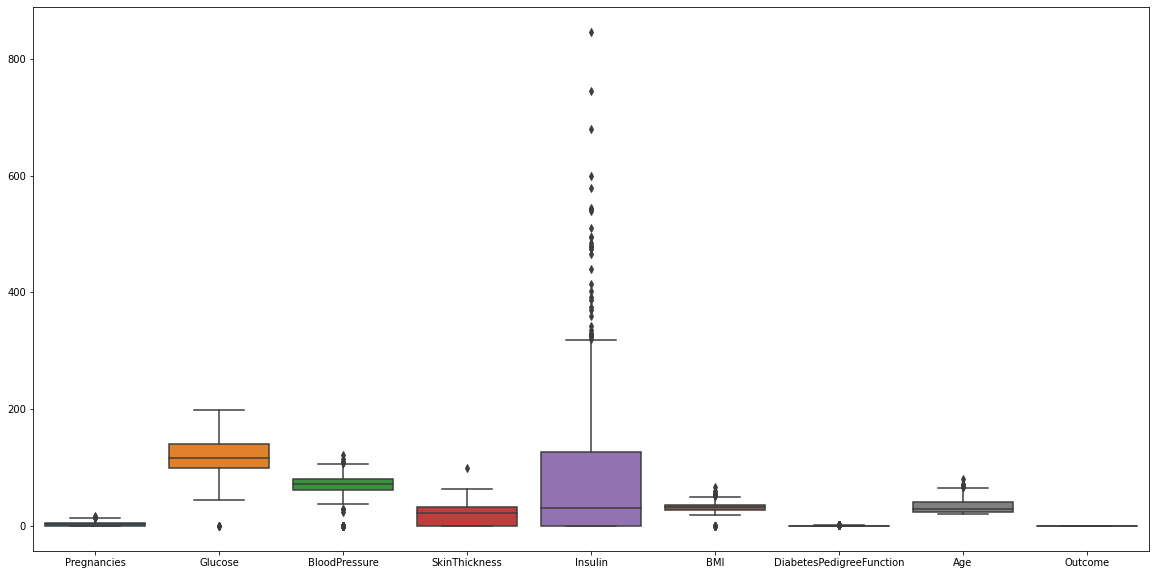

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
# insulin columns contains more outliers


318.125
(768, 9)


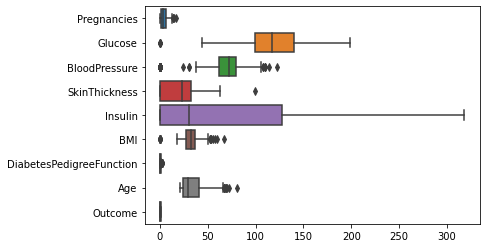

In [ ]:
q75,q25=np.percentile(df['Insulin'],[75,25])
# Calculating IQR
iqr=q75-q25
whisker=q75+(1.5*iqr)
print(whisker)
#Capping the outliers to the upperwhisker value
df['Insulin']=df['Insulin'].clip(upper=whisker)
sns.boxplot(data=df,orient='h')
print(df.shape)


Handling Null values

In [ ]:
# As null values are present as '0', checking the total count of '0'
a=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
print((df.iloc[:,1:6 ] == 0).sum())
# Replacing 0 with np.NaN to make sure the values are null
df.iloc[:, 1:6] = df.iloc[:,1:6].replace(0, np.NaN)
# Dropping if the columns have more than 40% null values
df = df.loc[:, df.isnull().mean() < .5]
# Dropping the rows having more than 40% null values
df= df.loc[df.isnull().mean(axis=1) < .4, :]
print("Shape after dropping null values",df.shape)
df.head()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64
Shape after dropping null values (761, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Filling all nan values by median
df.iloc[:,1:6]=df.iloc[:,1:6].fillna(df.iloc[:,1:6].median())
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

visualization of features

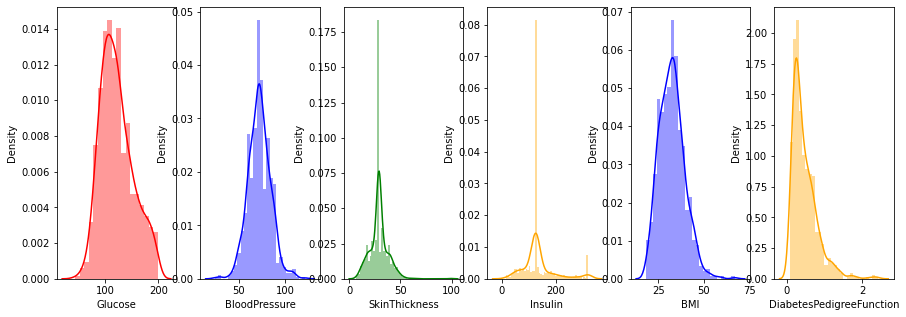

In [ ]:
#x.hist(figsize=(20,15))
#plt.show()
plt.figure(figsize=(15,5))
plt.subplot(1,6,1)
sns.distplot(df['Glucose'],color='red')
plt.subplot(1,6,2)
sns.distplot(df['BloodPressure'],color='blue')
plt.subplot(1,6,3)
sns.distplot(df['SkinThickness'],color='green')
plt.subplot(1,6,4)
sns.distplot(df['Insulin'],color='orange')
plt.subplot(1,6,5)
sns.distplot(df['BMI'],color='blue')
plt.subplot(1,6,6)
sns.distplot(df['DiabetesPedigreeFunction'],color='orange')
#here most featrures are right skewed


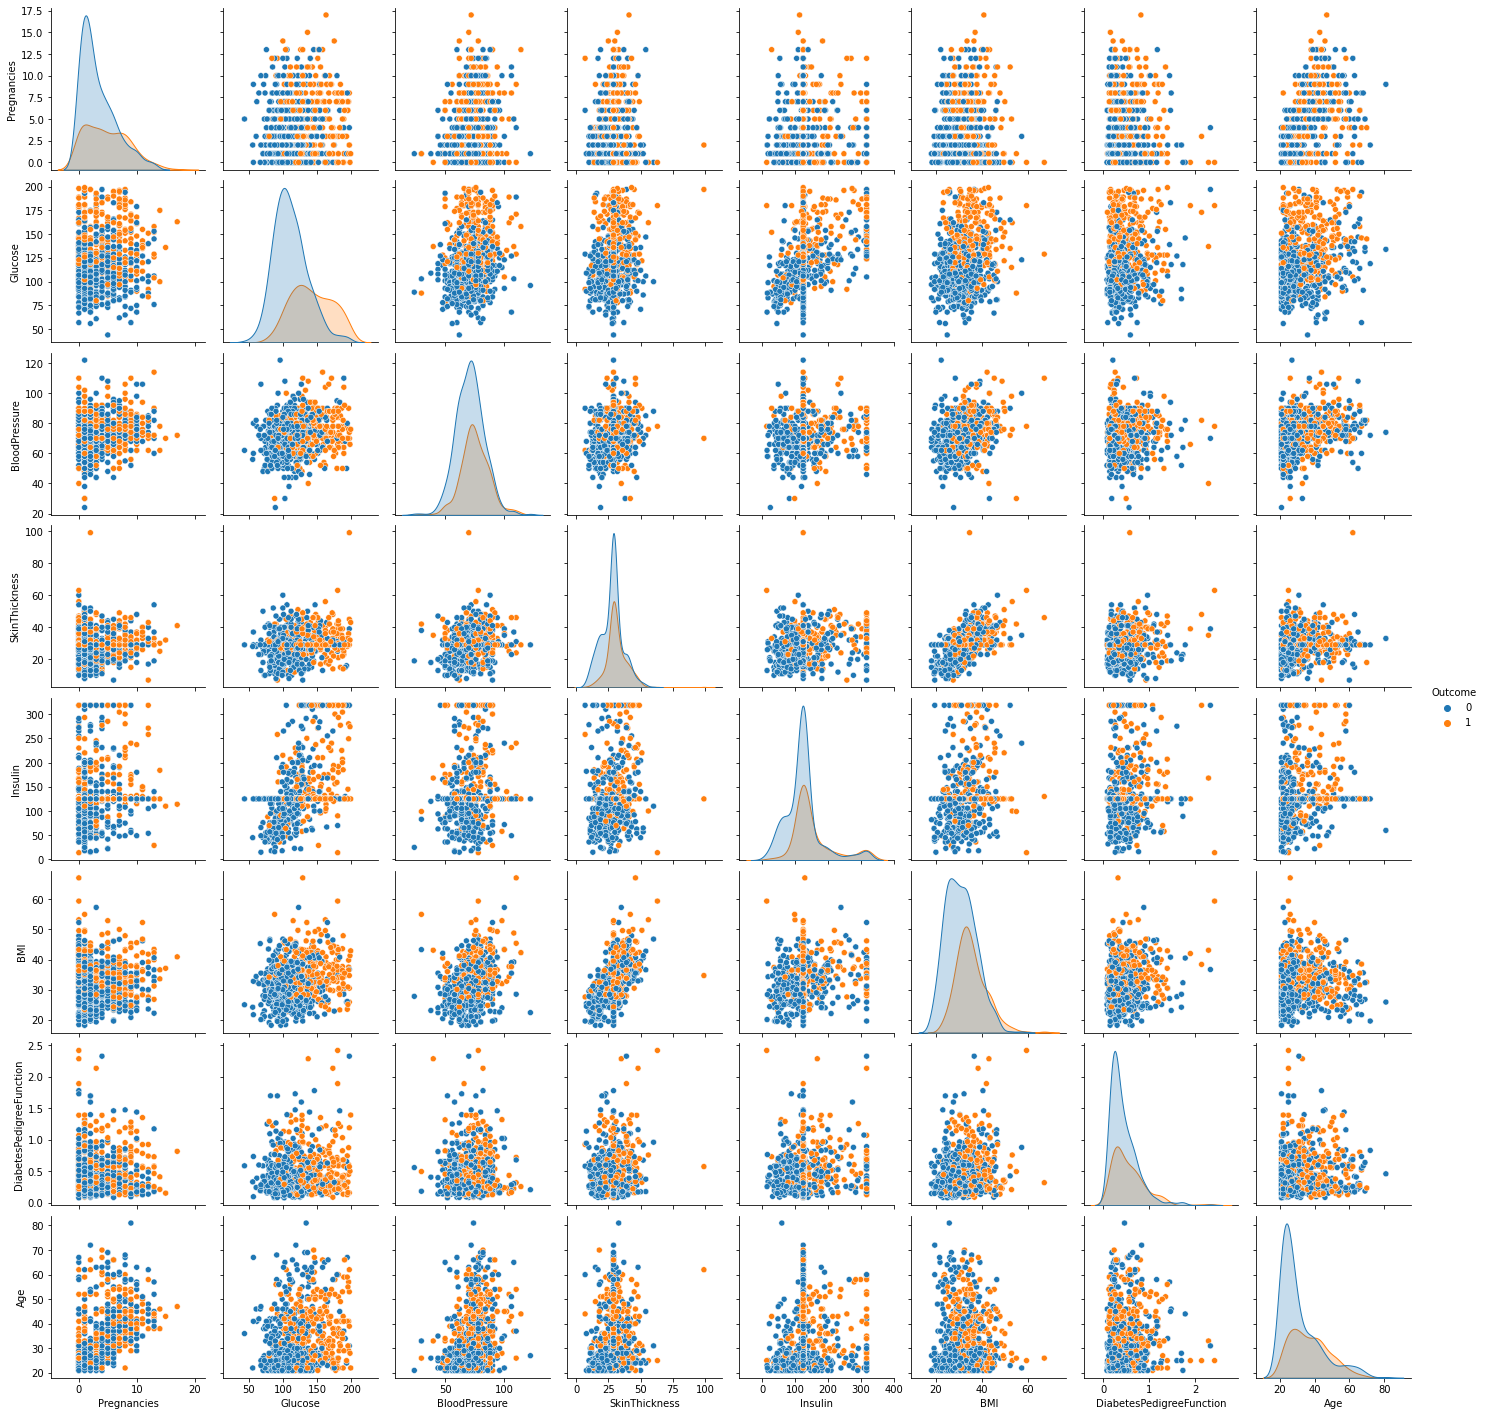

In [ ]:
sns.pairplot(data=df,hue='Outcome')


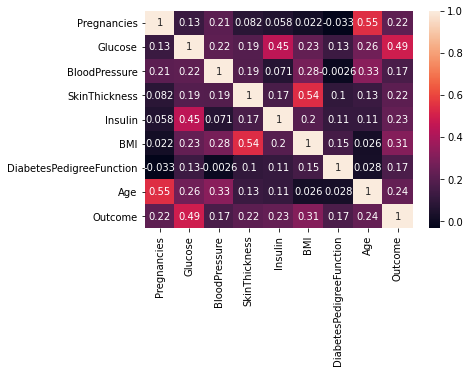

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']
# Checking for imbalance dataset
df['Outcome'].value_counts() # this is not imba;lanced dataset


0    494
1    267
Name: Outcome, dtype: int64

In [ ]:
# Standardizing/Normalizing the variable using MinMaxsclaer - Bringing down the value between [0,1]
x= StandardScaler().fit_transform(x)

In [ ]:
#Train_Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(608, 8) (153, 8) (608,) (153,)


Building Models

In [ ]:
# Create model test harness
models = [('LR', LogisticRegression(C=10)),('KNN',KNeighborsClassifier(n_neighbors=5)),
          ('DTREE', DecisionTreeClassifier(random_state=42)),
          ('RF',RandomForestClassifier(n_estimators=100,random_state=50)),
          ('XGBoost',xgb.XGBClassifier(n_estimators=50,learning_rate=0.1, random_state=50)),
          ('Adaboost', AdaBoostClassifier(n_estimators=50, random_state=50)),
          ('gb_boost',GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=50)),]
# Evaluate data on test harness
results = []
names = []
num_folds = 10
scoring = 'accuracy'
print("Trainning and Test Accuracy Of Models :")
for name, model in models:
  kfold = KFold(n_splits=10, random_state=50)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  test_score=accuracy_score(y_test,pred)
  results.append(cv_results)
  names.append(name)
  print('%s: %f %f (%f)' % (name, cv_results.mean(), test_score,cv_results.std()))

Trainning and Test Accuracy Of Models :
LR: 0.750219 0.823529 (0.069275)
KNN: 0.741913 0.797386 (0.049969)
DTREE: 0.695874 0.777778 (0.069845)
RF: 0.765027 0.803922 (0.069736)
XGBoost: 0.758525 0.810458 (0.065022)
Adaboost: 0.743497 0.784314 (0.073606)
gb_boost: 0.763415 0.790850 (0.067225)


Tunning Hyperparameter

In [ ]:
xg=xgb.XGBClassifier()
params= {'min_child_weight': [i for i in range(10)],'max_depth': [i for i in range(3,10)],'gamma':[i/10.0 for i in range(0,5)],'subsample':[i/10.0 for i in range(6,10)],
'colsample_bytree':[i/10.0 for i in range(6,10)],'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
'learning_rate':[0.1,0.01,0.001,0.15],
'n_estimators':[15,20,50,100,130,200]
}
random_search=RandomizedSearchCV(xg,param_distributions=params,n_iter=5,cv=5).fit(x_train,y_train)
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0.2,
              learning_rate=0.15, max_delta_step=0, max_depth=9,
              min_child_weight=6, missing=None, n_estimators=20, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 38 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=7
[16:05:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nod

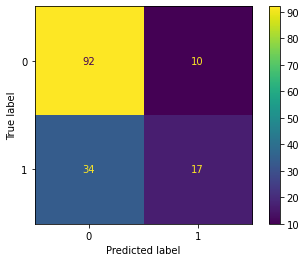

In [ ]:
xg=xgb.XGBClassifier (base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=1,
importance_type='gain', interaction_constraints='',learning_rate=0.001, max_delta_step=0, max_depth=7,
min_child_weight=3, monotone_constraints='(1,-1)',n_estimators=130, n_jobs=0, num_parallel_tree=1, random_state=50,
reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
tree_method='exact', validate_parameters=1, verbosity=2).fit(x_train,y_train)
pred=xg.predict(x_test)
print(plot_confusion_matrix(xg,x_test,y_test))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Tunning Gradient Boosting

In [ ]:
gb=GradientBoostingClassifier()
params={'n_estimators':range(50,300,10),'max_depth':range(3,15),'min_samples_split'
:range(1,20), 'min_samples_leaf':range(1,20),'max_features':range(5,20),'learning_rate':[0.1,0.001,0.05,0.15]}
random_search=RandomizedSearchCV(gb,param_distributions=params,n_iter=5,cv=5).fit(x_train,y_train)
random_search.best_estimator_


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=7,
                           max_features=8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=11,
                           min_weight_fraction_leaf=0.0, n_estimators=70,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       102
           1       0.72      0.76      0.74        51

    accuracy                           0.82       153
   macro avg       0.80      0.81      0.80       153
weighted avg       0.83      0.82      0.82       153



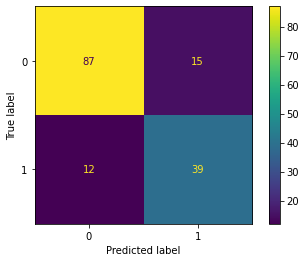

In [ ]:
gb=GradientBoostingClassifier(max_depth=10, max_features=5, min_samples_leaf=15,
min_samples_split=5, n_estimators=50).fit(x_train,y_train)
pred=gb.predict(x_test)
print(plot_confusion_matrix(gb,x_test,y_test))
print(classification_report(y_test,pred))